In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.1/153.1 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install torch
!pip3 install konlpy
!pip3 install tensorflow
!pip install transformers
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp310-cp310-linux_x86_64.whl size=661637 sha256=aae825cb1010fb814b83406bcce86816dbfd3083713b263254efe251e166e7ac
  Stored in directory: /root/.cache/pip/wheels/1a/1e/0d/99f55911d90f2b95b9f7c176d5813ef3622894a4b30fde6bd3
Successfully built gluonnlp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.5 MB/s eta 0:00:00
     ━━━

In [ ]:
import tensorflow as tf
import torch
from konlpy.tag import Okt

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime
import re
import pickle
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
data = pd.read_csv('./rearranged_data.csv')

# Load the provided CSV file
data.head()

,transcription,label
0,남편도 떠나고 자식들도 떠나고 이젠 나 혼자야. 과거가 너무 그리워서 서글퍼.,1
1,이번주중 미세먼지 농도 좋은인 날 있으면 알려줄래,0
2,우리 식구에 대해서 묻지 않았으면 좋겠어.,1
3,거실 불 키고 사랑 노래 틀어줘,0
4,난 술도 안 마시고 담배도 안 피우는데 암에 걸려서 얼마 못 산대. 너무 억울해.,1


In [ ]:
print(len(data))

100000


In [ ]:
train_data = data[:70000]
test_data = data[70000:]

In [ ]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','것']

In [ ]:
X_train = []
for sentence in tqdm(train_data['transcription']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 70000/70000 [02:41<00:00, 432.40it/s]


In [ ]:
X_test = []
for sentence in tqdm(test_data['transcription']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 30000/30000 [01:09<00:00, 434.27it/s]


In [ ]:
eda_data = data[data['label']==1]

In [ ]:
eda_data.head()

,transcription,label
0,남편도 떠나고 자식들도 떠나고 이젠 나 혼자야. 과거가 너무 그리워서 서글퍼.,1
2,우리 식구에 대해서 묻지 않았으면 좋겠어.,1
4,난 술도 안 마시고 담배도 안 피우는데 암에 걸려서 얼마 못 산대. 너무 억울해.,1
6,남편이 나에게 숨기는 것이 있는 것 같아.,1
8,내가 말수가 없다는 이유로 재미없는 노인이라고 소문이 나서 상처받았어.,1


In [ ]:
eda = []
for sentence in tqdm(eda_data['transcription']):
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    for i in stopwords_removed_sentence:
      eda.append(i)

100%|██████████| 50000/50000 [02:29<00:00, 333.99it/s]


In [ ]:
from collections import Counter

result = Counter(eda)
word_dic = dict(result)
print(word_dic)

{'남편': 2375, '자식': 1411, '젠': 261, '나': 10656, '혼자': 1102, '과거': 40, '우리': 1646, '식구': 59, '대해': 432, '난': 1376, '술': 461, '안': 4470, '담배': 192, '암': 367, '얼마': 600, '못': 2927, '내': 10657, '말수': 6, '이유': 317, '노인': 297, '소문': 97, '상처': 459, '출산': 194, '더': 1424, '시부모': 28, '요구': 82, '거절': 119, '노후': 779, '준비': 1171, '위해': 382, '차': 110, '사업': 214, '시작': 298, '친구': 7622, '새': 63, '질투': 239, '몸': 1161, '누가': 76, '날': 1127, '생각': 1966, '이제': 1388, '아이': 1030, '감기': 49, '약': 216, '다가': 33, '차사': 2, '가나': 6, '당황': 1135, '치매': 303, '증상': 55, '점점': 485, '마음대로': 57, '게': 2208, '짜증': 950, '움직': 38, '이기': 24, '짐': 83, '자신': 716, '남자친구': 644, '자꾸': 1252, '거짓말': 158, '화가': 1577, '담임': 45, '선생님': 529, '왜': 1166, '그': 836, '애': 859, '보호': 58, '이해': 164, '다음': 106, '주': 71, '시험': 722, '게임': 210, '달리': 32, '손주': 84, '김': 217, '할머니': 247, '샘': 8, '전자레인지': 1, '하나': 687, '때': 1804, '엄마': 1591, '남자': 452, '원래': 52, '기립': 5, '저혈압': 10, '아내': 2158, '꾀병': 6, '부린다': 6, '대학교': 191, '사춘기': 68, '거': 1511, '알': 5

In [ ]:
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
print(sorted_word_dic)

[('내', 10657), ('나', 10656), ('친구', 7622), ('안', 4470), ('못', 2927), ('사람', 2896), ('요즘', 2717), ('때문', 2545), ('말', 2525), ('돈', 2446), ('남편', 2375), ('회사', 2375), ('일', 2333), ('게', 2208), ('아내', 2158), ('오늘', 2066), ('부모님', 2029), ('걱정', 1977), ('생각', 1966), ('정말', 1837), ('때', 1804), ('나이', 1671), ('우리', 1646), ('결혼', 1634), ('집', 1594), ('엄마', 1591), ('화가', 1577), ('수', 1569), ('거', 1511), ('직장', 1458), ('더', 1424), ('자식', 1411), ('이제', 1388), ('난', 1376), ('가족', 1358), ('이번', 1303), ('아들', 1292), ('해', 1265), ('학교', 1259), ('자꾸', 1252), ('마음', 1202), ('취업', 1184), ('공부', 1172), ('준비', 1171), ('왜', 1166), ('몸', 1161), ('당황', 1135), ('날', 1127), ('혼자', 1102), ('건강', 1078), ('걸', 1069), ('병원', 1067), ('아이', 1030), ('기분', 1013), ('아빠', 971), ('짜증', 950), ('다른', 949), ('성적', 948), ('딸', 910), ('스트레스', 908), ('지금', 895), ('전', 881), ('애', 859), ('그', 836), ('계속', 834), ('갑자기', 794), ('노후', 779), ('이혼', 736), ('시험', 722), ('아무', 721), ('보고', 721), ('자신', 716), ('하나', 687), ('앞', 681), (

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

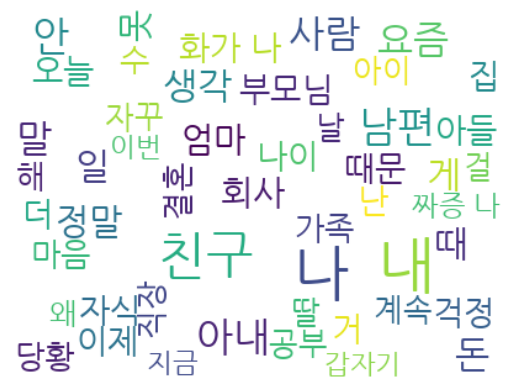

In [ ]:
from wordcloud.wordcloud import FONT_PATH
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

text = " ".join(eda)
wordcloud = WordCloud(
    max_font_size=50,
    max_words=50,
    background_color= 'white',
    relative_scaling=.5,
    width = 400,
    height = 300,
    font_path=FONT_PATH).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 17533
등장 빈도가 2번 이하인 희귀 단어의 수: 8754
단어 집합에서 희귀 단어의 비율: 49.92870586893287
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.7450778952108872


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8780


In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

리뷰의 최대 길이 : 53
리뷰의 평균 길이 : 8.976471428571429


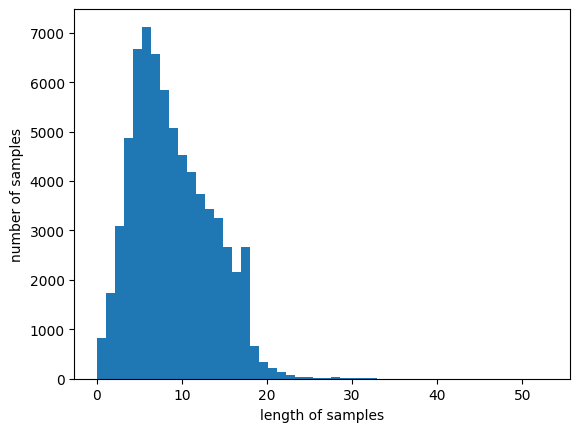

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 200
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 200 이하인 샘플의 비율: 100.0


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

embedding_dim = 100
hidden_units = 128
l2_lambda = 0.01  # L2 규제 강도 조절값

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units, kernel_regularizer=l2(l2_lambda)))  # L2 규제 적용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=64, validation_split=0.2)



Epoch 1/20
875/875 [==============================] - ETA: 0s - loss: 0.1646 - acc: 0.9726
Epoch 1: val_acc improved from -inf to 0.99671, saving model to best_model.h5
875/875 [==============================] - 18s 19ms/step - loss: 0.1646 - acc: 0.9726 - val_loss: 0.0219 - val_acc: 0.9967
Epoch 2/20
874/875 [============================>.] - ETA: 0s - loss: 0.0396 - acc: 0.9929
Epoch 2: val_acc improved from 0.99671 to 0.99736, saving model to best_model.h5
875/875 [==============================] - 9s 11ms/step - loss: 0.0396 - acc: 0.9929 - val_loss: 0.0189 - val_acc: 0.9974
Epoch 3/20
875/875 [==============================] - ETA: 0s - loss: 0.0394 - acc: 0.9912
Epoch 3: val_acc improved from 0.99736 to 0.99743, saving model to best_model.h5
875/875 [==============================] - 9s 11ms/step - loss: 0.0394 - acc: 0.9912 - val_loss: 0.0159 - val_acc: 0.9974
Epoch 4/20
871/875 [============================>.] - ETA: 0s - loss: 0.0246 - acc: 0.9948
Epoch 4: val_acc improved fro

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))  # L2 규제 제거
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/20
872/875 [============================>.] - ETA: 0s - loss: 0.0458 - acc: 0.9839
Epoch 1: val_acc improved from -inf to 0.99771, saving model to best_model.h5
875/875 [==============================] - 19s 19ms/step - loss: 0.0456 - acc: 0.9840 - val_loss: 0.0091 - val_acc: 0.9977
Epoch 2/20
 20/875 [..............................] - ETA: 7s - loss: 0.0047 - acc: 0.9992

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


874/875 [============================>.] - ETA: 0s - loss: 0.0101 - acc: 0.9978
Epoch 2: val_acc improved from 0.99771 to 0.99779, saving model to best_model.h5
875/875 [==============================] - 9s 10ms/step - loss: 0.0101 - acc: 0.9978 - val_loss: 0.0094 - val_acc: 0.9978
Epoch 3/20
870/875 [============================>.] - ETA: 0s - loss: 0.0093 - acc: 0.9980
Epoch 3: val_acc improved from 0.99779 to 0.99786, saving model to best_model.h5
875/875 [==============================] - 9s 10ms/step - loss: 0.0094 - acc: 0.9979 - val_loss: 0.0094 - val_acc: 0.9979
Epoch 4/20
873/875 [============================>.] - ETA: 0s - loss: 0.0083 - acc: 0.9983
Epoch 4: val_acc did not improve from 0.99786
875/875 [==============================] - 9s 10ms/step - loss: 0.0083 - acc: 0.9983 - val_loss: 0.0103 - val_acc: 0.9976
Epoch 5/20
875/875 [==============================] - ETA: 0s - loss: 0.0076 - acc: 0.9984
Epoch 5: val_acc did not improve from 0.99786
875/875 [==================

In [ ]:
from sklearn.metrics import f1_score

# 모델의 예측값을 얻습니다
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # 예측값을 0 또는 1로 변환

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

938/938 [==============================] - 4s 4ms/step
F1 Score: 0.9973625346375988


In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
def voice_predict(new_sentence):
  # new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  print("{:.2f}% 확률로 부정적 문구.\n".format(score * 100))

In [ ]:
def voice_predict(new_sentence):
  # new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 부정적 문구.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 일반적 문구.\n".format((1 - score) * 100))

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

938/938 [==============================] - 5s 5ms/step - loss: 0.0110 - acc: 0.9975

 테스트 정확도: 0.9975


In [ ]:
voice_predict('학교 생활이 나한테 솔직히 조금 힘들어. 휴학하고 싶어')

1/1 [==============================] - 0s 23ms/step
99.99% 확률로 부정적 문구.



In [ ]:
import whisper

model = whisper.load_model("large")

In [ ]:
import librosa
from IPython.display import Audio

# Load the audio file using librosa
y, sr = librosa.load("./test1.mp3", sr=None)

# Now, pass the loaded audio data and rate to Audio
Audio(y, rate=sr)

In [ ]:
voice = transcribe("./test1.mp3")
print(voice)
voice_predict(voice)


Detected language: ko
학교 생활이 나한테 솔직히 조금 힘들어. 휴학하고 싶어.
1/1 [==============================] - 0s 20ms/step
100.00% 확률로 부정적 문구.



In [ ]:
def transcribe(audio):

    # load audio and pad/trim it to fit 30 seconds
    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    # make log-Mel spectrogram and move to the same device as the model
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # detect the spoken language
    _, probs = model.detect_language(mel)
    print(f"Detected language: {max(probs, key=probs.get)}")

    # decode the audio
    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    return result.text


Detected language: ko
학교 생활이 나한테 솔직히 조금 힘들어. 휴학하고 싶어.
1/1 [==============================] - 0s 20ms/step
100.00% 확률로 부정적 문구.



In [ ]:
voice = transcribe("./test1.mp3")
print(voice)
voice_predict(voice)

In [ ]:
pip install whisper

In [ ]:
pip install whisper --upgrade
